In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
drinks_df = pd.read_csv('/Users/sungminhong/Documents/dataanalysis/python-data-analysis/data/drinks.csv')

In [3]:
drinks_df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [4]:
print(drinks_df.info())
print(drinks_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB
None
       beer_servings  spirit_servings  wine_servings  \
count     193.000000       193.000000     193.000000   
mean      106.160622        80.994819      49.450777   
std       101.143103        88.284312      79.697598   
min         0.000000         0.000000       0.000000   
25%        20.000000         4.000000       1.000000   
50%        76.000000 

### Feature간의 상관관계 분석

#### 단순상관 분석
- 두변수간의 선형적관계를 상관계수로 표현하는 것

In [5]:
# Pearson 상관계수
corr = drinks_df[['beer_servings', 'wine_servings']].corr(method='pearson')
corr

,beer_servings,wine_servings
beer_servings,1.000000,0.527172
wine_servings,0.527172,1.000000


In [6]:
# feature 간의 상관계수 행렬을 구합니다
cols = drinks_df.columns.tolist()
cols_corr = cols[1:-1]

corr = drinks_df[cols_corr].corr(method='pearson')
corr


,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


In [7]:
import seaborn as sns

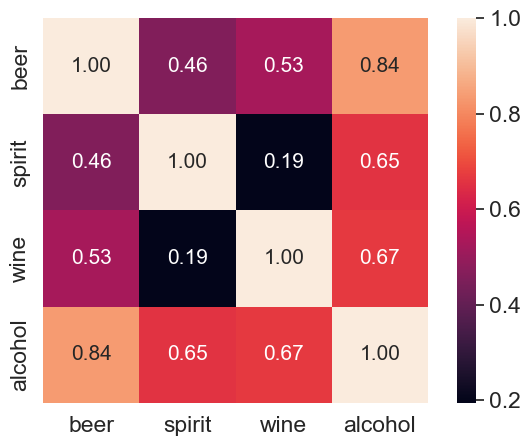

In [8]:
cols_view = ['beer', 'spirit', 'wine', 'alcohol'] # 그래프 출력을 위한 cols 이름을 축약합니다.
sns.set_theme(font_scale=1.5)
hm = sns.heatmap(corr.values,
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 15},
            yticklabels=cols_view,
            xticklabels=cols_view)

plt.tight_layout()
plt.show()

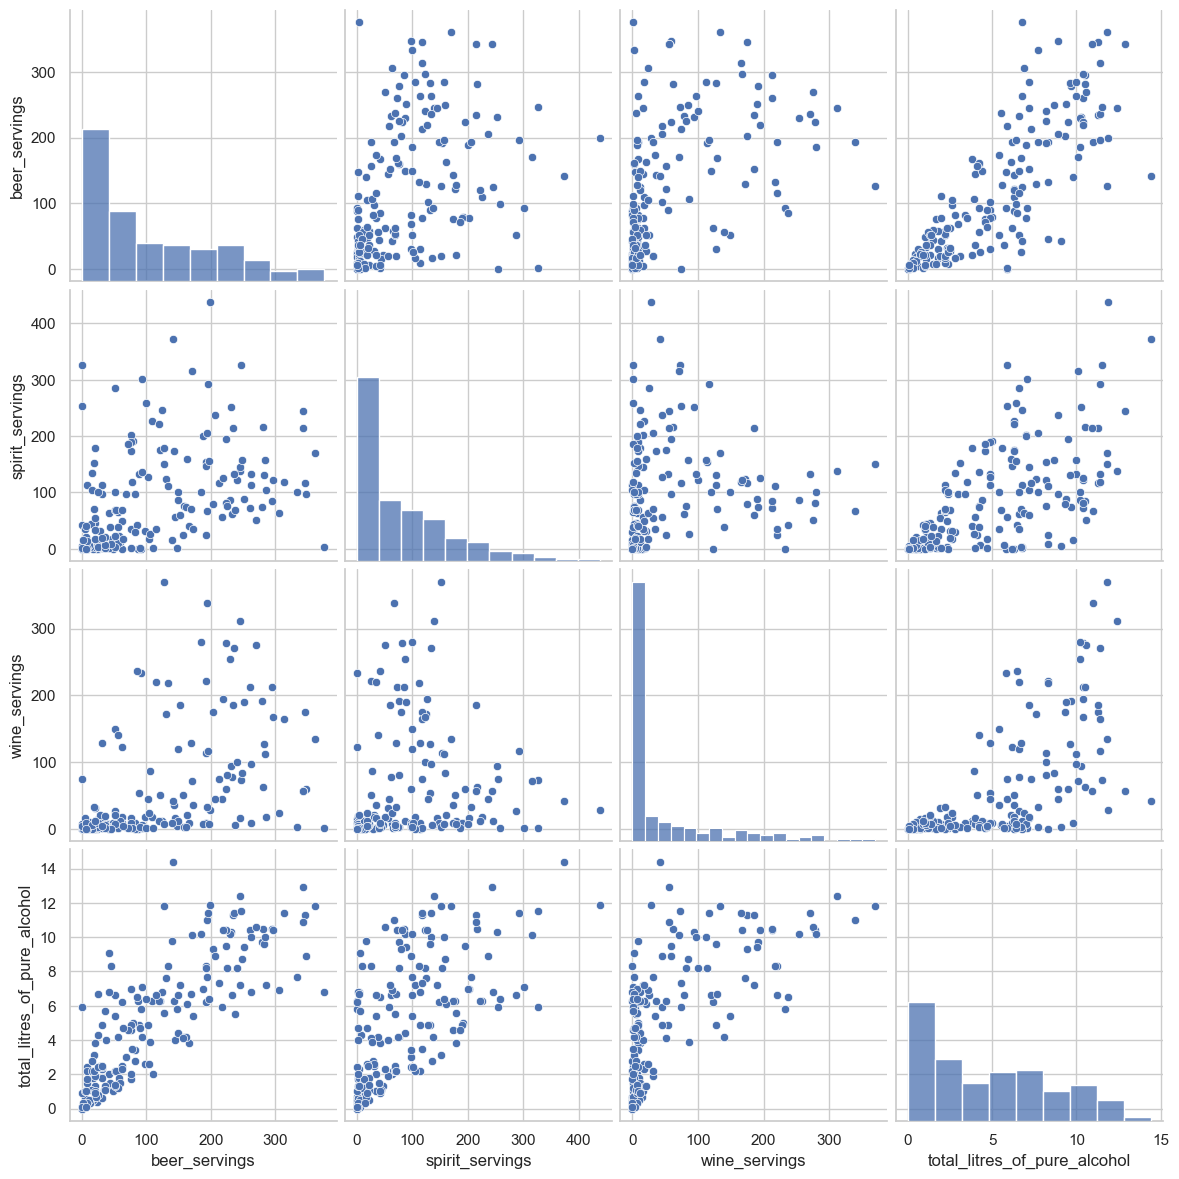

In [9]:
cols_view = ['beer', 'spirit', 'wine', 'alcohol'] # 그래프 출력을 위한 cols 이름을 축약합니다.
sns.set_theme(style='whitegrid', context='notebook')
sns.pairplot(drinks_df[['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']]
             , height = 3)

plt.show()

In [10]:
print(drinks_df.isnull().sum())
print("-"*50)
print(drinks_df.dtypes)

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64
--------------------------------------------------
country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object


In [11]:
# 결측 데이터를 처리합니다 : 기타 대륙으로 통합
drinks_df['continent'] = drinks_df['continent'].fillna('OT')

In [12]:
drinks_df['continent'].isnull().sum()

0

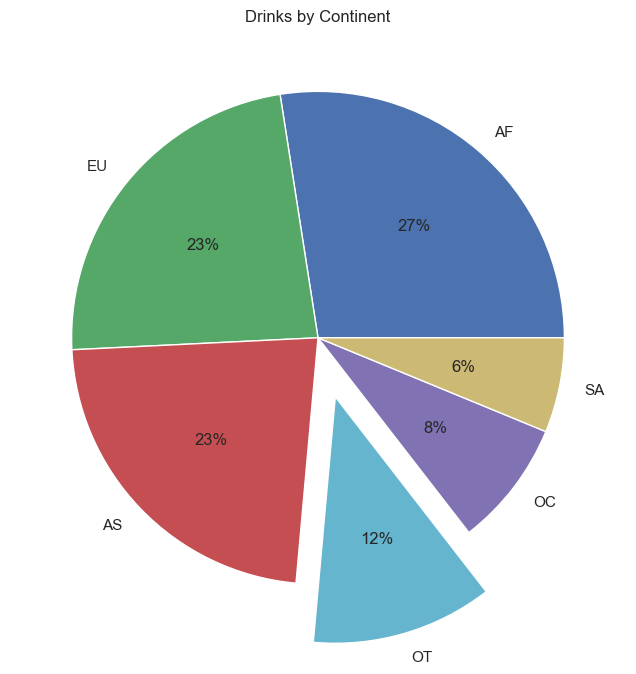

In [13]:
labels = drinks_df['continent'].value_counts().index.tolist()
fracs1 = drinks_df['continent'].value_counts().values.tolist()
explode = [0,0,0,0.25,0,0]


plt.figure(figsize=(8,8))
plt.pie(fracs1, labels=labels, explode=explode, shadow=False, autopct='%.0f%%', colors='bgrcmyk')
plt.title('Drinks by Continent')
plt.show()


In [14]:
# 대륙별 spirit_servings의 평균, 최소, 최대 합계를 계산함
''' 여기서 agg()는:

mean: 평균
min: 최소값
max: 최대값
sum: 합계

를 한 번에 계산합니다.
'''
result = drinks_df.groupby('continent')['spirit_servings'].agg(['mean', 'min', 'max', 'sum'])
result

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812
SA,114.750000,25,302,1377


In [15]:
# 전체 평균보다 많은 알코올을 섭취하는 대륙을 구함

total_mean = drinks_df['total_litres_of_pure_alcohol'].mean()
cont_mean = drinks_df.groupby('continent')['total_litres_of_pure_alcohol'].mean()
cont_over_mean = cont_mean[cont_mean>= total_mean]

In [16]:
print(cont_over_mean)

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64


In [17]:
# 평균 beer_servings이 가장 높은 대륙을 구합니다
# idxmax는 groupby로 만들어진 시리즈에서 value값이 가장 큰 행의 인덱스 값을 반환
cont_beer_max = drinks_df.groupby('continent')['beer_servings'].mean().idxmax()
cont_beer_max

'EU'

In [18]:
# 대륙별 spirit_servings의 평균, 최소, 최대, 합계를 시각화 합니다.

n_groups = len(result.index)
means = result['mean'].tolist()
mins = result['min'].tolist()
maxs = result['max'].tolist()
sums = result['sum'].tolist()


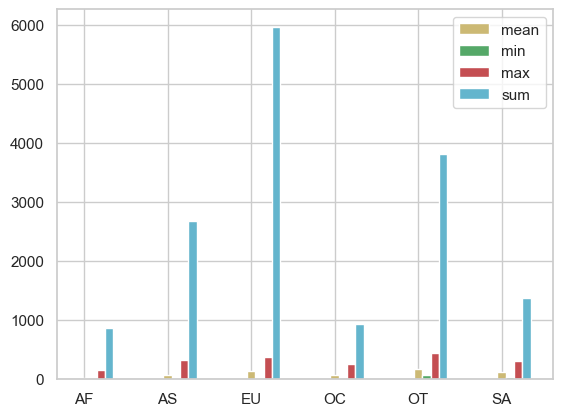

In [19]:
index = np.arange(n_groups)
bar_width = 0.1

rects1 = plt.bar(index, means, bar_width, color='y', label='mean')
rects2 = plt.bar(index + bar_width, mins, bar_width, color='g', label='min')
rects3 = plt.bar(index + bar_width*2, maxs, bar_width, color='r', label='max')
rects4 = plt.bar(index + bar_width*3, sums, bar_width, color='c', label='sum')

plt.xticks(index, result.index.tolist())
plt.legend()

plt.show()

In [22]:
continents = cont_mean.index.tolist()


/var/folders/kh/6khx28zs2bq8wjptklpbkj440000gn/T/ipykernel_49115/2840931765.py:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([-.5, 6], [total_mean, total_mean], 'k--', color = 'r')
/var/folders/kh/6khx28zs2bq8wjptklpbkj440000gn/T/ipykernel_49115/2840931765.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


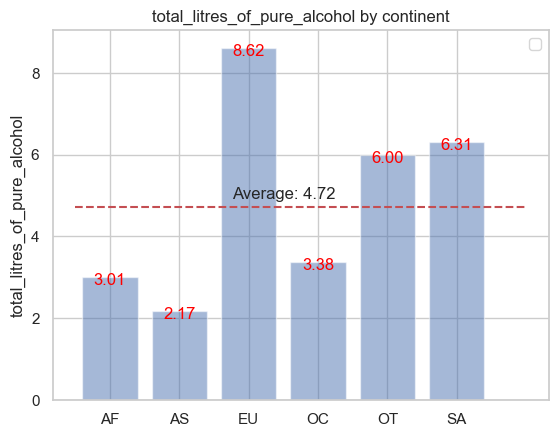

In [39]:
# x축 위치값을 continents 길이만큼 균일한 간격으로 생성 (예: [0,1,2,3,4,5])
x_pos = np.arange(len(continents))
'''
하지만 NumPy의 arange()를 사용하는 것이 선호되는 이유가 있습니다:

Matplotlib은 내부적으로 NumPy 배열과 잘 통합되어 있어 성능이 더 최적화됨
큰 데이터셋을 다룰 때 NumPy 배열이 메모리를 더 효율적으로 사용
나중에 배열 연산이 필요할 때 NumPy 배열이 더 유용
'''

# alcohol 리스트 생성: continent별 평균값 리스트에 전체 평균값 추가
alcohol = cont_mean.tolist()

# 막대 그래프 생성
# x_pos: x축 위치값
# alcohol: y축 값(알코올 양)
# align='center': 막대를 x축 눈금 중앙에 위치
# alpha=0.5: 막대의 투명도 (0:투명 ~ 1:불투명)
bar_list = plt.bar(x_pos, alcohol, align='center', alpha=0.5)

# 마지막 막대(전체 평균)의 색상을 빨간색으로 변경
# bar_list[len(continents)-1].set_color('r')

# 전체 평균을 나타내는 수평 점선 추가
# [0., 6]: x축의 시작과 끝 지점
# [total_mean, total_mean]: 양 끝점의 y값(동일)
# 'k--': 검은색(k) 점선(--)
plt.plot([-.5, 6], [total_mean, total_mean], 'k--', color = 'r')

plt.text((len(continents)-1)/2, total_mean + 0.2, 
         f'Average: {total_mean:.2f}', 
         horizontalalignment='center')

for i, v in enumerate(alcohol):
    plt.text(x_pos[i], v + 0.1,  # x좌표, y좌표(막대보다 약간 위)
             f'{v:.2f}',         # 소수점 둘째자리까지
             horizontalalignment='center',
             verticalalignment = 'top',
             color = 'red')

# x축 눈금에 대륙 이름 표시
plt.xticks(x_pos, continents)

# y축 레이블 설정
plt.ylabel('total_litres_of_pure_alcohol')

# 그래프 제목 설정
plt.title('total_litres_of_pure_alcohol by continent')

# 범례추가
plt.legend()

# 그래프 표시
plt.show()

### 통계적 분석
- 분석 대상간의 통계적 차이 검정하기

t-statistic과 p-value에 대해 설명해드리겠습니다:
t-statistic (t-값):

표본 평균이 귀무가설에서 주장하는 모평균과 얼마나 다른지를 표준화된 척도로 나타낸 값입니다
t = (표본평균 - 귀무가설의 평균) / (표본의 표준오차)
절대값이 클수록 귀무가설이 참일 가능성이 낮아집니다
t-값의 크기는 효과의 크기와 표본 크기에 영향을 받습니다

p-value (유의확률):

귀무가설이 참일 때, 현재 관찰된 것과 같거나 더 극단적인 결과가 나올 확률입니다
0에서 1 사이의 값을 가집니다
일반적으로 0.05나 0.01을 기준값으로 사용합니다
p-value가 기준값보다 작으면 귀무가설을 기각하고 대립가설을 채택합니다
p < 0.05는 "이런 결과가 우연히 발생할 확률이 5% 미만"이라는 의미입니다

귀무가설(Null Hypothesis)은 통계적 가설검정에서 기본이 되는 가설입니다.
간단히 설명하면:

"차이가 없다"
"효과가 없다"
"관계가 없다"
라고 가정하는 것입니다.

예시를 통해 설명하면:

의약품 효과 테스트


귀무가설: "새로운 약은 효과가 없다" (기존 약과 차이가 없다)
대립가설: "새로운 약은 효과가 있다" (기존 약과 차이가 있다)


교육방법 비교


귀무가설: "새로운 교육방법은 기존 방법과 학습효과가 같다"
대립가설: "새로운 교육방법은 기존 방법과 학습효과가 다르다"


성별에 따른 임금 차이


귀무가설: "성별에 따른 임금 차이가 없다"
대립가설: "성별에 따른 임금 차이가 있다"

통계 검정은 이 귀무가설을 기각할만한 충분한 증거가 있는지를 확인하는 과정입니다. p-value가 유의수준(보통 0.05)보다 작으면 귀무가설을 기각하고 대립가설을 채택하게 됩니다.

In [47]:
africa_df = drinks_df[drinks_df['continent'] == 'AF']
europe_df = drinks_df[drinks_df['continent'] == 'EU']

In [48]:
from scipy import stats


In [49]:
tTestResult = stats.ttest_ind(africa_df['spirit_servings'], europe_df['spirit_servings'])
tTestResultDiffVar = stats.ttest_ind(africa_df['spirit_servings'], europe_df['spirit_servings'], equal_var=False)

In [50]:
print(tTestResult)
print(tTestResultDiffVar)

TtestResult(statistic=-10.155621495624699, pvalue=6.890824096085334e-17, df=96.0)
TtestResult(statistic=-9.531000658671124, pvalue=3.7903117582619493e-13, df=53.783324202255045)


In [52]:
print('The t-statistic and p-value assuming equal variance are %.3f and %.3f.' % tTestResult)
print('The t-statistic and p-value not assuming equal variance are %.3f and %.3f.' % tTestResultDiffVar)

The t-statistic and p-value assuming equal variance are -10.156 and 0.000.
The t-statistic and p-value not assuming equal variance are -9.531 and 0.000.
